✅ Librerías importadas correctamente

📊 INFORMACIÓN GENERAL DEL DATASET
Dimensiones: 374 filas x 13 columnas

Primeras 5 filas:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart 

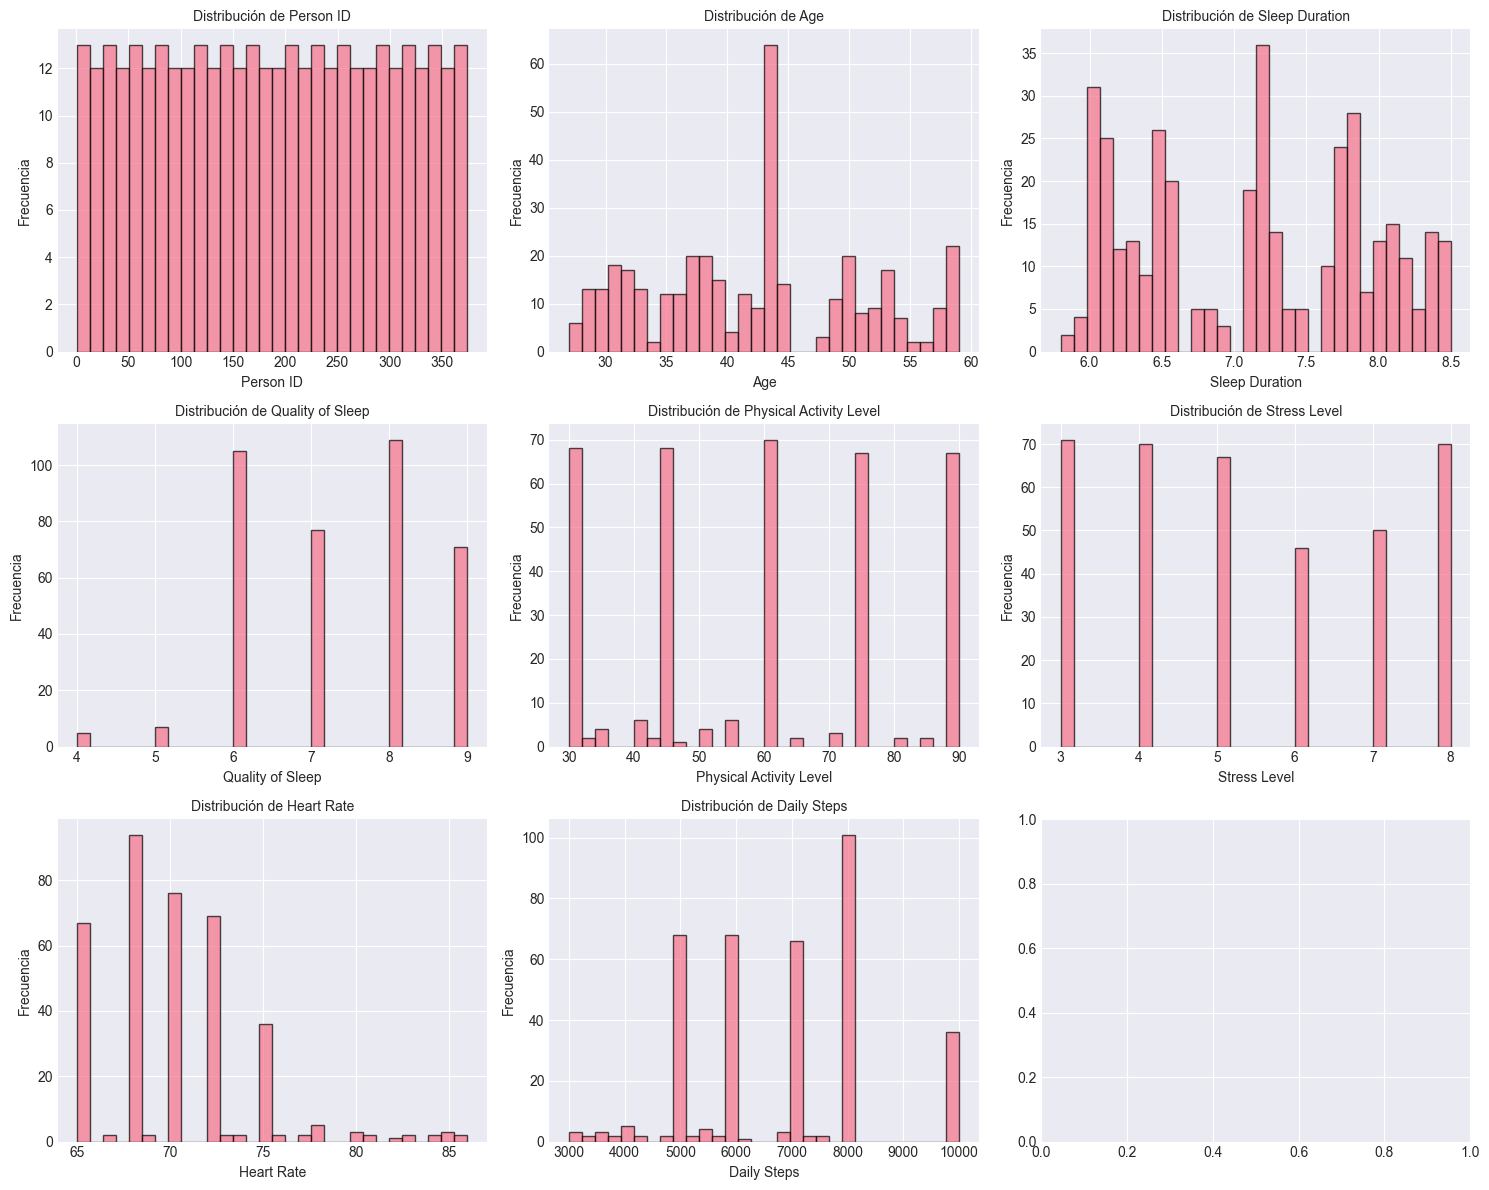

✅ Gráficas de distribución guardadas

Variables categóricas encontradas: 5


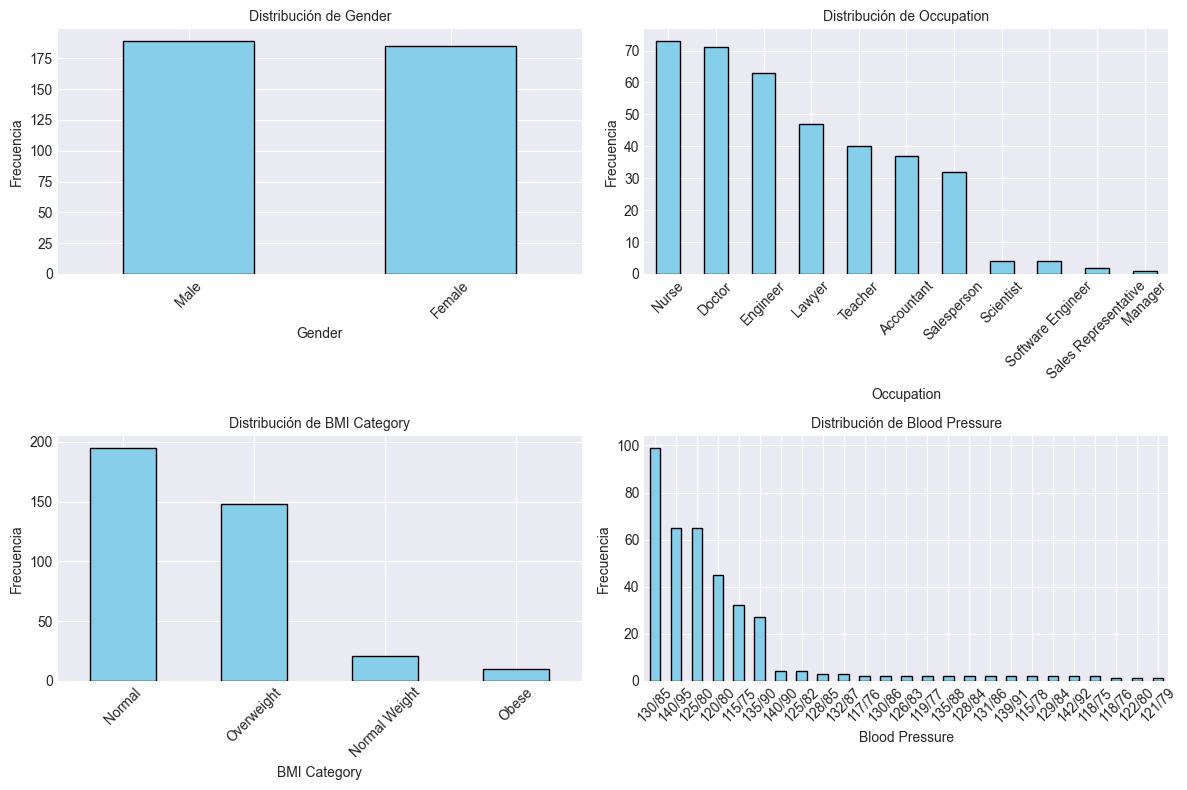


🔍 FILTRADO DE OUTLIERS
  - Person ID: 0 outliers detectados
  - Age: 0 outliers detectados
  - Sleep Duration: 0 outliers detectados
  - Quality of Sleep: 0 outliers detectados
  - Physical Activity Level: 0 outliers detectados
  - Stress Level: 0 outliers detectados
  - Heart Rate: 15 outliers detectados
  - Daily Steps: 0 outliers detectados

✅ Filas eliminadas: 15
✅ Dataset final: 359 filas

Razón: Se eliminan outliers extremos para mejorar la calidad del modelo
y evitar que valores atípicos afecten el entrenamiento.

🎯 CREACIÓN DE VARIABLE OBJETIVO BINARIA

📊 ANÁLISIS BIVARIANTE


KeyError: 'Stress_Category'

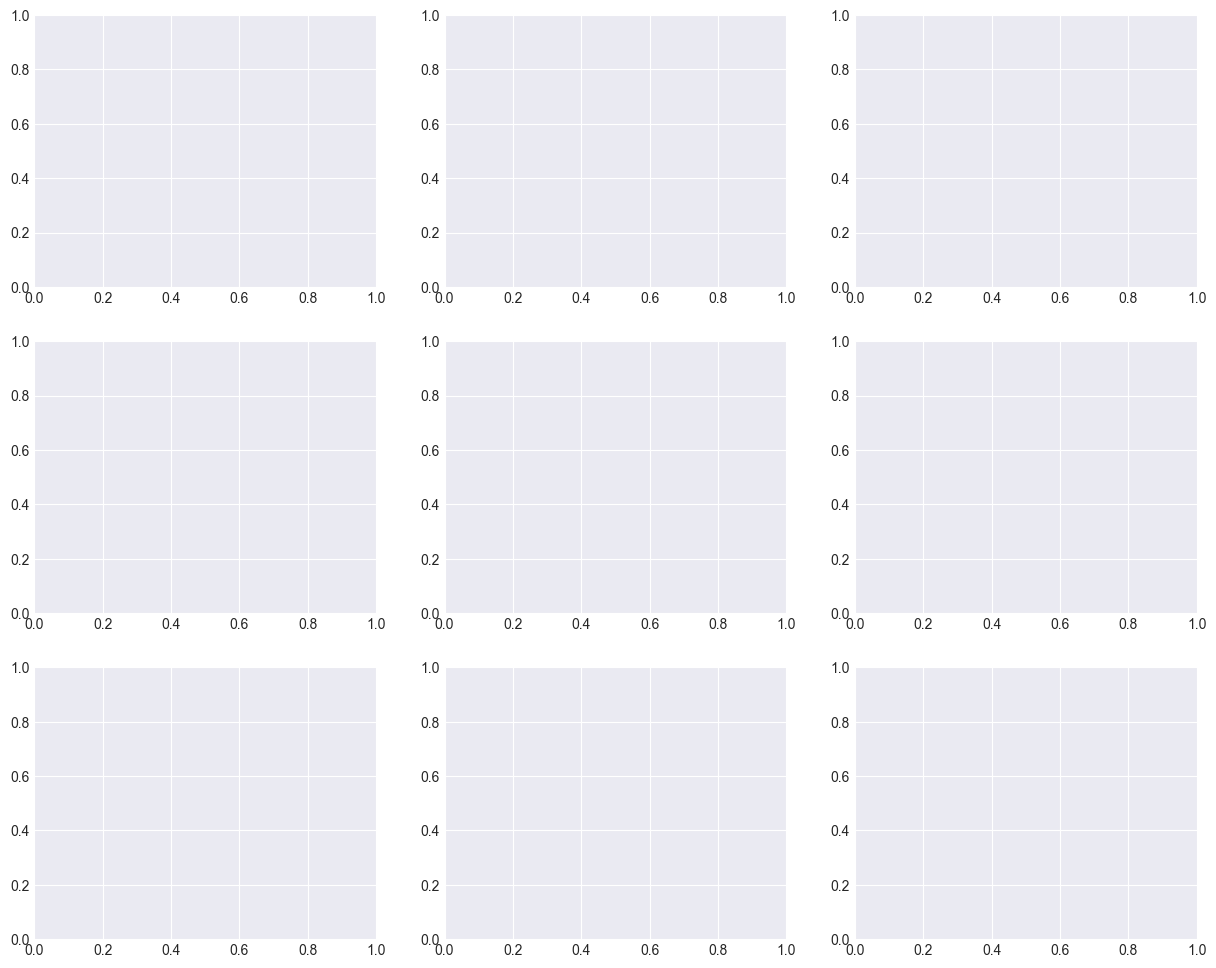

In [1]:
# Análisis de Datos: Patrones de Sueño y Estilo de Vida
# Josué Miranda Gutiérrez - Ingeniería Biomédica - ULAT

# ============================================
# 1. IMPORTAR LIBRERÍAS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

# ============================================
# 2. CARGA Y EXPLORACIÓN INICIAL DE DATOS
# ============================================

# Cargar el dataset
df = pd.read_csv('datos/sleep_data.csv')

print("\n📊 INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
print(df.head())

print("\n📋 INFORMACIÓN DE COLUMNAS")
print("="*50)
print(df.info())

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)
print(df.describe())

print("\n🔍 VALORES NULOS")
print("="*50)
print(df.isnull().sum())

# ============================================
# 3. TRATAMIENTO DE VALORES VACÍOS
# ============================================

print("\n🛠️ TRATAMIENTO DE VALORES VACÍOS")
print("="*50)

# Verificar si hay valores nulos
if df.isnull().sum().sum() > 0:
    print("Se encontraron valores nulos. Aplicando estrategia de tratamiento...")
    
    # Para variables numéricas: rellenar con la mediana
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
            print(f"  - {col}: rellenado con mediana")
    
    # Para variables categóricas: rellenar con la moda
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"  - {col}: rellenado con moda")
else:
    print("✅ No se encontraron valores nulos en el dataset")

# ============================================
# 4. ANÁLISIS UNIVARIANTE
# ============================================

print("\n📊 ANÁLISIS UNIVARIANTE")
print("="*50)

# Variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nVariables numéricas encontradas: {len(numeric_columns)}")

# Crear gráficas de distribución para variables numéricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns[:9]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}', fontsize=10)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('imagenes/distribucion_variables_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficas de distribución guardadas")

# Variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nVariables categóricas encontradas: {len(categorical_columns)}")

if len(categorical_columns) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.ravel()
    
    for idx, col in enumerate(categorical_columns[:4]):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribución de {col}', fontsize=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('imagenes/distribucion_variables_categoricas.png', dpi=300, bbox_inches='tight')
    plt.show()

# Deducciones sobre la variable de estrés
if 'Stress_Level' in df.columns:
    print("\n🔍 ANÁLISIS DEL NIVEL DE ESTRÉS:")
    print(df['Stress_Level'].describe())
    print(f"\nObservamos que los niveles de estrés tienen:")
    print(f"  - Media: {df['Stress_Level'].mean():.2f}")
    print(f"  - Mediana: {df['Stress_Level'].median():.2f}")
    print(f"  - Desviación estándar: {df['Stress_Level'].std():.2f}")

# ============================================
# 5. FILTRADO DE VARIABLES (OUTLIERS)
# ============================================

print("\n🔍 FILTRADO DE OUTLIERS")
print("="*50)

# Método de intercuartiles (IQR)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"  - {column}: {len(outliers)} outliers detectados")
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_original_size = len(df)

# Aplicar filtrado solo a variables numéricas relevantes
for col in numeric_columns:
    if col != 'Stress_Level':  # No eliminar outliers de la variable objetivo aún
        df = remove_outliers_iqr(df, col)

print(f"\n✅ Filas eliminadas: {df_original_size - len(df)}")
print(f"✅ Dataset final: {len(df)} filas")
print("\nRazón: Se eliminan outliers extremos para mejorar la calidad del modelo")
print("y evitar que valores atípicos afecten el entrenamiento.")

# ============================================
# 6. CREAR VARIABLE OBJETIVO BINARIA
# ============================================

print("\n🎯 CREACIÓN DE VARIABLE OBJETIVO BINARIA")
print("="*50)

if 'Stress_Level' in df.columns:
    # Crear variable binaria
    df['Stress_Category'] = df['Stress_Level'].apply(
        lambda x: 'ESTRES_MODERADO' if 3 <= x <= 6 else 'ESTRESADO'
    )
    
    print("Variable objetivo creada:")
    print(df['Stress_Category'].value_counts())
    print(f"\nProporción:")
    print(df['Stress_Category'].value_counts(normalize=True) * 100)
    
    # Eliminar la variable numérica original
    df.drop('Stress_Level', axis=1, inplace=True)
    print("\n✅ Variable 'Stress_Level' eliminada del dataset")

# ============================================
# 7. ANÁLISIS BIVARIANTE
# ============================================

print("\n📊 ANÁLISIS BIVARIANTE")
print("="*50)

# Análisis de variable objetivo vs variables numéricas
numeric_cols_updated = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols_updated[:9]):
    df.boxplot(column=col, by='Stress_Category', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Stress_Category')
    axes[idx].set_xlabel('Categoría de Estrés')
    axes[idx].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.savefig('imagenes/analisis_bivariante.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Análisis bivariante guardado")

# ============================================
# 8. MATRIZ DE CORRELACIÓN
# ============================================

print("\n🔗 MATRIZ DE CORRELACIÓN")
print("="*50)

# Codificar variable objetivo para correlación
df['Stress_Encoded'] = df['Stress_Category'].map({'ESTRES_MODERADO': 0, 'ESTRESADO': 1})

# Matriz de correlación
correlation_matrix = df[numeric_cols_updated.tolist() + ['Stress_Encoded']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('imagenes/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📈 Correlaciones altas detectadas:")
# Encontrar correlaciones altas (> 0.7) excluyendo la diagonal
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlación': correlation_matrix.iloc[i, j]
            })

if high_corr:
    for item in high_corr:
        print(f"  {item['Variable 1']} <-> {item['Variable 2']}: {item['Correlación']:.2f}")
else:
    print("  No se encontraron correlaciones muy altas (>0.7)")

# ============================================
# 9. DIVISIÓN TRAIN/TEST
# ============================================

print("\n✂️ DIVISIÓN DEL DATASET (80/20)")
print("="*50)

# Preparar datos para división
X = df.drop(['Stress_Category', 'Stress_Encoded'], axis=1)
y = df['Stress_Category']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Train set: {len(X_train)} muestras")
print(f"✅ Test set: {len(X_test)} muestras")

# Verificar estratificación
print("\n📊 Proporción en Train:")
print(y_train.value_counts(normalize=True) * 100)

print("\n📊 Proporción en Test:")
print(y_test.value_counts(normalize=True) * 100)

# Guardar datasets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('datos/train.csv', index=False)
test_df.to_csv('datos/test.csv', index=False)

print("\n✅ Datasets guardados:")
print("  - datos/train.csv")
print("  - datos/test.csv")

print("\n" + "="*50)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*50)
